# Exercise Sheet 1



### Read the Dataset

- Use Pandas to read the 'covertype.csv' file
- The dataset contains information on different forest cover types
- Look at the columns. Which of them contain meaningful features?



### Seperate Features and Labels
- Define x as the vectors of meaningful features
- Define y as the labels (Cover_Type)



### Split the dataset into two disjoint datasets for training and testing
- Randomly split the dataset. Use 70% for training and 30% for testing.
- Define x_train and x_test as the feature vectors
- Define y_train and y_test as the labels
    - Hint: Have a look at the sklearn package

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_csv("covertype.csv")
df_columns=df.columns.tolist()
x = df[df_columns[1:-1]]
y = df[df_columns[-1]]

x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.30, random_state=42)


### Train a simple deep neural network
- Use Keras to define a simple Multi-Layer Perceptron with at least 3 layers and a Softmax classifier
    - You have to explicitly give the input shape of the first layer
    - The other layer shapes are inferred
    - The last layer should have as many neurons as there are classes
        - How many classes are there?
- Define 'accuracy' as performance metric when compiling the network model
- Train the MLP with x_train, y_train
    - Make sure to save the training history for later assessment
- Evaluate the performance on x_test, y_test

In [112]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

input_dim = x_train.shape[1]
number_of_classes = 8
#input_dim

model = Sequential()

model.add(Dense(64, activation='relu', input_dim=input_dim))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#multi-class classification problem

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy']
              )

history= model.fit(x_train, y_train,
          epochs=100,
          batch_size=64,
          validation_split=0.1)

test_score = model.evaluate(x_test, y_test, batch_size=64)

print("Test_loss: %f - Test_accuracy: %f" % (test_score[0], test_score[1]))

#print("Validation accuracy:", history.history["val_acc"])
#print("Training accuracy:", history.history["acc"])



# model.compile(...)

# history = model.fit(...)

Train on 9525 samples, validate on 1059 samples
Epoch 1/100
9525/9525 [==============================] - 4s 387us/step - loss: 13.8536 - acc: 0.1405 - val_loss: 13.8807 - val_acc: 0.1388
Epoch 2/100
9525/9525 [==============================] - 1s 61us/step - loss: 13.8252 - acc: 0.1423 - val_loss: 13.8807 - val_acc: 0.1388
Epoch 3/100
9525/9525 [==============================] - 1s 59us/step - loss: 13.8150 - acc: 0.1429 - val_loss: 13.8807 - val_acc: 0.1388
Epoch 4/100
9525/9525 [==============================] - 2s 163us/step - loss: 13.8150 - acc: 0.1429 - val_loss: 13.8807 - val_acc: 0.1388
Epoch 5/100
9525/9525 [==============================] - 1s 143us/step - loss: 13.8133 - acc: 0.1430 - val_loss: 13.8807 - val_acc: 0.1388
Epoch 6/100
9525/9525 [==============================] - 1s 63us/step - loss: 13.8167 - acc: 0.1428 - val_loss: 13.8807 - val_acc: 0.1388
Epoch 7/100
9525/9525 [==============================] - 1s 61us/step - loss: 13.8066 - acc: 0.1434 - val_loss: 13.8807 -

9525/9525 [==============================] - 1s 123us/step - loss: 13.8184 - acc: 0.1427 - val_loss: 13.8807 - val_acc: 0.1388
Epoch 60/100
9525/9525 [==============================] - 1s 69us/step - loss: 13.8167 - acc: 0.1428 - val_loss: 13.8807 - val_acc: 0.1388
Epoch 61/100
9525/9525 [==============================] - 1s 106us/step - loss: 13.8150 - acc: 0.1429 - val_loss: 13.8807 - val_acc: 0.1388
Epoch 62/100
9525/9525 [==============================] - 3s 315us/step - loss: 13.8201 - acc: 0.1426 - val_loss: 13.8807 - val_acc: 0.1388
Epoch 63/100
9525/9525 [==============================] - 1s 77us/step - loss: 13.8150 - acc: 0.1429 - val_loss: 13.8807 - val_acc: 0.1388
Epoch 64/100
9525/9525 [==============================] - 1s 65us/step - loss: 13.8116 - acc: 0.1431 - val_loss: 13.8807 - val_acc: 0.1388
Epoch 65/100
9525/9525 [==============================] - 2s 248us/step - loss: 13.8167 - acc: 0.1428 - val_loss: 13.8807 - val_acc: 0.1388
Epoch 66/100
9525/9525 [============

### Debug
- If your loss is NaN, either your network architecture or your data is faulty
    - Check your network architecture
    - Check your data
        - Are there any NaN or infinite features or labels?
    - Print the labels.
        - How many unique labels do you have?
        - Are they [0, ..., n-1]?
            - If not, align them

In [113]:
import numpy as np




### Train again
- Reinitialize or redefine your MLP from above and train it again

### Does it work?
- The loss should now be a number.
- Does the network converge?



### Inspect the data
- Compute the min, max, mean and standard deviation of each feature
- What data type do the columns have?
- Use Pandas to print the statistics in a table
- What could be problematic with the dataset?

In [114]:
import numpy as np
pd.options.display.float_format = '{:.2f}'.format


stats = pd.DataFrame(columns=["Type", "Min", "Max", "Mean", "Std"])
#x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.30, random_state=42)
for col in x.columns:
    stats.loc[col] = {"Type":x[col].dtype,
                      "Min": x[col].min(),
                      "Max": x[col].max(),
                      "Mean": x[col].mean(),
                      "Std":x[col].std() 
                 }



display(stats)

,Type,Min,Max,Mean,Std
Elevation,int64,1863,3849,2749.32,417.68
Aspect,int64,0,360,156.68,110.09
Slope,int64,0,52,16.50,8.45
Horizontal_Distance_To_Hydrology,int64,0,1343,227.20,210.08
Vertical_Distance_To_Hydrology,int64,-146,554,51.08,61.24
Horizontal_Distance_To_Roadways,int64,0,6890,1714.02,1325.07
Hillshade_9am,int64,0,254,212.70,30.56
Hillshade_Noon,int64,99,254,218.97,22.80
Hillshade_3pm,int64,0,248,135.09,45.90
Horizontal_Distance_To_Fire_Points,int64,0,6993,1511.15,1099.94


### Preprocess the Data
- Normalize or standardize your data, so all features are at the same scale.
    - This will help your network to use all available features and not be biased by some features with large values
    - Does it make sense to normalize all columns, or only some?
- Hint: Again, look if you find something useful in sklearn


- Never use test data to optimize your training! This includes the preprocessing
    - Find preprocessing parameters on your training data only!
    - Transform all your data with the computed parameters
    - You have to remember which of your samples are used for training and which are for testing


In [115]:
from sklearn import preprocessing

# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_df = scaler.fit_transform(x)
scaled_df = pd.DataFrame(scaled_df, columns=x.columns)
scaled_df.head()


C:\Users\udit0\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\udit0\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-0.37,-0.96,-1.60,0.15,-0.83,-0.91,0.27,0.57,0.28,4.33,...,-0.15,-0.22,-0.21,-0.04,-0.08,-0.03,-0.05,-0.22,-0.21,-0.18
1,-0.38,-0.91,-1.72,-0.07,-0.93,-1.00,0.24,0.70,0.35,4.29,...,-0.15,-0.22,-0.21,-0.04,-0.08,-0.03,-0.05,-0.22,-0.21,-0.18
2,0.13,-0.16,-0.89,0.19,0.23,1.11,0.70,0.83,-0.00,4.19,...,-0.15,-0.22,-0.21,-0.04,-0.08,-0.03,-0.05,-0.22,-0.21,-0.18
3,0.09,-0.02,0.18,0.07,1.09,1.04,0.83,0.83,-0.29,4.27,...,-0.15,-0.22,-0.21,-0.04,-0.08,-0.03,-0.05,-0.22,-0.21,-0.18
4,-0.37,-1.01,-1.72,-0.35,-0.85,-1.00,0.24,0.66,0.32,4.24,...,-0.15,-0.22,-0.21,-0.04,-0.08,-0.03,-0.05,-0.22,-0.21,-0.18


### Inspect data again
- Print the statistics of the preprocessed data using the code from above

In [116]:
stats = pd.DataFrame(columns=["Type", "Min", "Max", "Mean", "Std"])

for col in scaled_df.columns:
    stats.loc[col] = {"Type": scaled_df[col].dtype,
                      "Min": scaled_df[col].min(),
                      "Max": scaled_df[col].max(),
                      "Mean": scaled_df[col].mean(),
                      "Std":scaled_df[col].std() 
                 }


display(stats)

,Type,Min,Max,Mean,Std
Elevation,float64,-2.12,2.63,-0.00,1.00
Aspect,float64,-1.42,1.85,0.00,1.00
Slope,float64,-1.95,4.20,0.00,1.00
Horizontal_Distance_To_Hydrology,float64,-1.08,5.31,-0.00,1.00
Vertical_Distance_To_Hydrology,float64,-3.22,8.21,-0.00,1.00
Horizontal_Distance_To_Roadways,float64,-1.29,3.91,0.00,1.00
Hillshade_9am,float64,-6.96,1.35,-0.00,1.00
Hillshade_Noon,float64,-5.26,1.54,0.00,1.00
Hillshade_3pm,float64,-2.94,2.46,0.00,1.00
Horizontal_Distance_To_Fire_Points,float64,-1.37,4.98,0.00,1.00


### Train the network again
- Reinitialize or redefine your MLP from above and train it again


In [117]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

x_train, x_test, y_train, y_test =  train_test_split(scaled_df, y, test_size=0.30, random_state=42)
input_dim = x_train.shape[1]
number_of_classes = 8


model = Sequential()

model.add(Dense(64, activation='relu', input_dim=input_dim))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#multi-class classification problem

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history= model.fit(x_train, y_train,
          epochs=100,
          batch_size=64, 
          validation_split=0.1)

test_score = model.evaluate(x_test, y_test, batch_size=64)

print("Test_loss: %f - Test_accuracy: %f" % (test_score[0], test_score[1]))

#print("Validation accuracy:", history.history["val_acc"])
#print("Training accuracy:", history.history["acc"])

# model.compile(...)

# history = model.fit(...)

Train on 9525 samples, validate on 1059 samples
Epoch 1/100
9525/9525 [==============================] - 2s 235us/step - loss: 1.8068 - acc: 0.2770 - val_loss: 1.2134 - val_acc: 0.5817
Epoch 2/100
9525/9525 [==============================] - 2s 163us/step - loss: 1.3023 - acc: 0.4427 - val_loss: 1.0563 - val_acc: 0.5883
Epoch 3/100
9525/9525 [==============================] - 1s 61us/step - loss: 1.1708 - acc: 0.4952 - val_loss: 0.9690 - val_acc: 0.6015
Epoch 4/100
9525/9525 [==============================] - 2s 176us/step - loss: 1.1139 - acc: 0.5213 - val_loss: 0.9290 - val_acc: 0.6431
Epoch 5/100
9525/9525 [==============================] - 1s 102us/step - loss: 1.0480 - acc: 0.5482 - val_loss: 0.9050 - val_acc: 0.6327
Epoch 6/100
9525/9525 [==============================] - 1s 69us/step - loss: 1.0246 - acc: 0.5623 - val_loss: 0.8886 - val_acc: 0.6298
Epoch 7/100
9525/9525 [==============================] - 1s 60us/step - loss: 0.9949 - acc: 0.5783 - val_loss: 0.8436 - val_acc: 0.6

9525/9525 [==============================] - 1s 68us/step - loss: 0.7636 - acc: 0.6783 - val_loss: 0.6657 - val_acc: 0.7309
Epoch 61/100
9525/9525 [==============================] - 1s 86us/step - loss: 0.7520 - acc: 0.6908 - val_loss: 0.6617 - val_acc: 0.7158
Epoch 62/100
9525/9525 [==============================] - 2s 180us/step - loss: 0.7457 - acc: 0.6889 - val_loss: 0.6674 - val_acc: 0.7375
Epoch 63/100
9525/9525 [==============================] - 1s 65us/step - loss: 0.7572 - acc: 0.6828 - val_loss: 0.6641 - val_acc: 0.7328
Epoch 64/100
9525/9525 [==============================] - 1s 61us/step - loss: 0.7510 - acc: 0.6880 - val_loss: 0.6558 - val_acc: 0.7365
Epoch 65/100
9525/9525 [==============================] - 1s 60us/step - loss: 0.7517 - acc: 0.6881 - val_loss: 0.6576 - val_acc: 0.7432
Epoch 66/100
9525/9525 [==============================] - 2s 200us/step - loss: 0.7424 - acc: 0.6926 - val_loss: 0.6519 - val_acc: 0.7309
Epoch 67/100
9525/9525 [============================

### Visualize the training
- use matplotlib.pyplot to visualize the keras history
- plot both the training accuracy and the validation accuracy

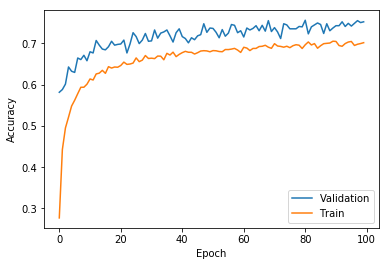

In [118]:
import matplotlib.pyplot as plt
plt.plot(history.history["val_acc"])
plt.plot(history.history["acc"])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation', 'Train'], loc='lower right')
plt.show()
